<a href="https://colab.research.google.com/github/josepmatias/nos_reten-ao/blob/main/elegiveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pyxlsb

In [3]:
#especificar o nome do ficheiro
resumo_r_nome="Resumo reactiva.xlsb"

In [4]:
#importar ficheiro

from google.colab import files
uploaded = files.upload()

Saving Resumo reactiva.xlsb to Resumo reactiva.xlsb


In [5]:
resumo_r=pd.read_excel(resumo_r_nome, sheet_name=0)

In [30]:
#renomear colunas da bd consoante reactiva ou proactiva

def renomear_cols (df):
  lista=df.columns.tolist()
  lista2=[]
  for i in lista:
    if i.find("RRR")!=-1:
      lista2.append(i.replace("RRR", "").strip())
    elif i.find("RPR")!=-1:
      lista2.append(i.replace("RPR", "").strip())
    else:
      lista2.append(i)
  return lista2

resumo_r.columns=renomear_cols(resumo_r)

In [68]:
resumo_r.columns

Index(['Cycle Id', 'Cycle Name', 'Incentive Type ID', 'Incentive Type Name',
       'Scheme Name', 'Channel IN', 'Commissioned SFID',
       'Commissioned SFID Name', 'Event SFID', 'Retention UserName',
       ...
       'Ranking Position', 'Justified Absences', 'Unjustified Absences',
       'Invoice Payment Days', 'SR Chargeback Rate',
       'Original Event Type Name', 'Chargeback Nr Points',
       'Value Pre Withholding', 'Original  Value', 'Parceiro'],
      dtype='object', length=101)

In [51]:
resumo_r.value_counts(subset=["Incentive Type Name", "Event Type Name"]).reset_index().sort_values(by=["Incentive Type Name", "count"], ascending=False)

,Incentive Type Name,Event Type Name,count
5,RRR_UPFRONT NOS,SERVICE REQUEST,22205
12,RRR_UPFRONT NOS,ACTIVAÇÃO DE SERVIÇO,606
18,RRR_PRÉMIO POR RANKING,PRÉMIO EXTRA,70
2,RRR_PRÉMIO POR PERMANÊNCIA,PRÉMIO DE PERMANÊNCIA,40451
0,RRR_PREVISÃO DE CHARGEBACK NOS,SERVICE REQUEST,64820
10,RRR_PREVISÃO DE CHARGEBACK NOS,NÃO CONFORMIDADE,777
13,RRR_PREVISÃO DE CHARGEBACK NOS,ACTIVAÇÃO DE SERVIÇO,606
17,RRR_PREVISÃO DE CHARGEBACK NOS,PRÉMIO EXTRA,70
24,RRR_PREVISÃO DE CHARGEBACK NOS,RR SDD,13
26,RRR_PREVISÃO DE CHARGEBACK NOS,PORTABILIDADE DE SERVIÇO,8


In [79]:


resumo_r.loc[resumo_r["Incentive Type Name"].str.find("PREVISÃO")!=-1, "Value"].describe().reset_index().transpose()


db=resumo_r.loc[(resumo_r["Incentive Type Name"]=="RRR_PREVISÃO DE CHARGEBACK NOS") &\
             (resumo_r["Value"]>0), ["Retention UserName", "Value"]].groupby("Retention UserName")["Value"].sum().reset_index()

db.loc[db["Value"]<0, :].count()

Retention UserName    0
Value                 0
dtype: int64

In [ ]:
#copiar linhas de srs sem o incentivo de chargeback

str1="Event Type Name"
str2="Original"
str3="Incentive Type Name"

filtro1="SERVICE REQUEST"
#resumo_r.columns

#col1 representa a coluna "event type name"
col1=[i for i in resumo_r.columns.tolist() if i.find(str1)!=-1 and i.find(str2)==-1] [0]
#col2 representa a coluna incentive type name
col2=[i for i in resumo_r.columns.tolist() if i.find(str3)!=-1 and i.find(str2)==-1] [0]

resumo_r.loc[(resumo_r[col2].str.find("Chargeback")==-1) & (resumo_r[col1]==filtro1), :].head(2)

,RRR Cycle Id,RRR Cycle Name,RRR Incentive Type ID,RRR Incentive Type Name,RRR Scheme Name,RRR Channel IN,RRR Commissioned SFID,RRR Commissioned SFID Name,RRR Event SFID,RRR Retention UserName,...,RRR Ranking Position,RRR Justified Absences,RRR Unjustified Absences,RRR Invoice Payment Days,RRR SR Chargeback Rate,RRR Original Event Type Name,RRR Chargeback Nr Points,RRR Value Pre Withholding,RRR Original Value,Parceiro
5790,5456.0,Ciclo RRR Janeiro-2024,bd0a589f-c4a6-4cda-9e38-ccee77abea77,RRR_ACERTO_AUDITORIAS_COMERCIAIS,RRR_ACERTO AUDITORIAS_REATIVA_RESIDENCIAL,MATRIZ BASE IN,G.R29.RI1.10P,Felisbela Ferreira,G.R29.RI1.10P,FPFERREIRA,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,NaN,NaN,G.R29
5791,5456.0,Ciclo RRR Janeiro-2024,d69f7177-6a1b-4252-aa5e-9cb89c991bfd,RRR_GCO_SUPERVISORES,RRR_GCO SUPERVISORES_REATIVA_RESIDENCIAL,MATRIZ BASE IN,G.R29.RI1.126,Nuno Silva,G.R29.RI1.126,U80008636,...,NaN,NaN,NaN,NaN,0.09,NaN,-10.0,NaN,NaN,G.R29


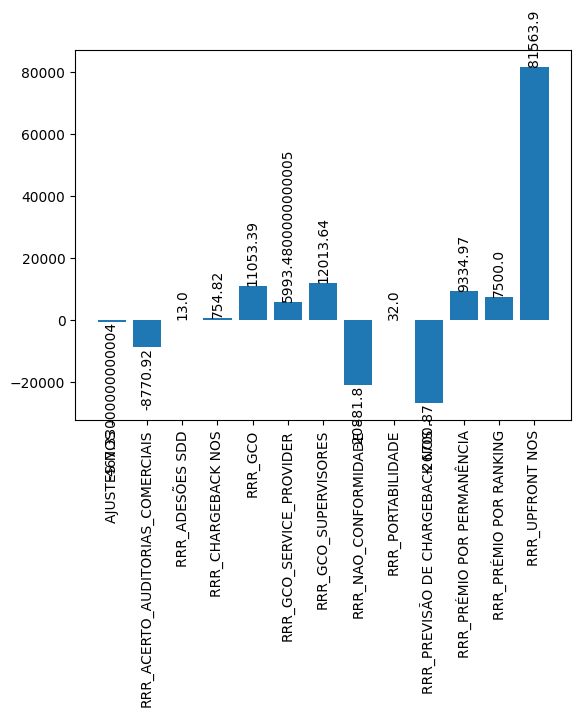

In [ ]:
#encontrar a coluna "valor"
#resumo_r.groupby(col2) []
colvalor=[i for i in resumo_r.columns.tolist() if i.endswith("Value") and i.find(str2)==-1] [0]


df=resumo_r.groupby(col2) [colvalor].sum().reset_index()

chart=plt.bar(df.iloc[:, 0], df.iloc[:, 1])
plt.xticks(rotation="vertical")
bar_labels=plt.bar_label(chart, df.iloc[:, 1])
for label in bar_labels:
    label.set_rotation(90)
    ":".format()

plt.show()

In [ ]:
#add different dataframes to the same excel file

#excel_file_path = 'multi_sheet_excel.xlsx'
#with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    #df1.to_excel(writer, sheet_name='Sheet1', index=False)
    #df2.to_excel(writer, sheet_name='Sheet2', index=False)
    #df3.to_excel(writer, sheet_name='Sheet3', index=False)